### Problem 1: Linear Regression

### You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


### Data Dictionary

Variable Name	Description

Carat	 Carat weight of the cubic zirconia.

Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color 	 Colour of the cubic zirconia.With D being the worst and J the best.

Clarity	Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price) IF, 
VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

Depth	 The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price	 the Price of the cubic zirconia.

X	 Length of the cubic zirconia in mm.
Y	 Width of the cubic zirconia in mm.
Z	 Height of the cubic zirconia in mm.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#### 1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [2]:
# Reading the data.

zirconia = pd.read_csv('D:\Study\Data Science and Machine Learning\Great_learning course\Main content\Module5 - Predictive Modelling\Week3 - Linear Discriminant Analysis\Project\cubic_zirconia.csv')

#### EDA

In [3]:
# Checking top 10 rows.

zirconia.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
# Checking the number of rows and columns in the data set.

zirconia.shape

(26967, 11)

#### Inference: 

* As we can see, there are 26967 rows and 11 columns.

In [5]:
# Dropping the unwanted column 'Unnamed:0'

zirconia = zirconia.drop('Unnamed: 0', axis=1)

In [6]:
# Checking the top rows of the data set again.
zirconia.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


#### Inference:

* Now we have the dataset without the unwanted column 'Unnamed: 0'.

In [7]:
# Checking data statistical summary.

zirconia.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


#### Inference:

* The data set seems to have outliers in most of the columns. 
* Columns like 'carat', 'depth', 'table', 'price' carrying max value point quite more than their standard deviation, which indicates towards potential outliers. 

In [8]:
# Checking data types.

zirconia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


#### Inference: 

* As we can see from the above table, there are 6 'float 64', 1 'int64' and 3 'object' data types. 


In [9]:
# finding the unique values in the data set. 

for column in zirconia.columns:
    if zirconia[column].dtype=='object':
        print(column.upper(),':',zirconia[column].nunique())
        print(zirconia[column].value_counts().sort_values())
        print('\n')

CUT : 5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR : 7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY : 8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




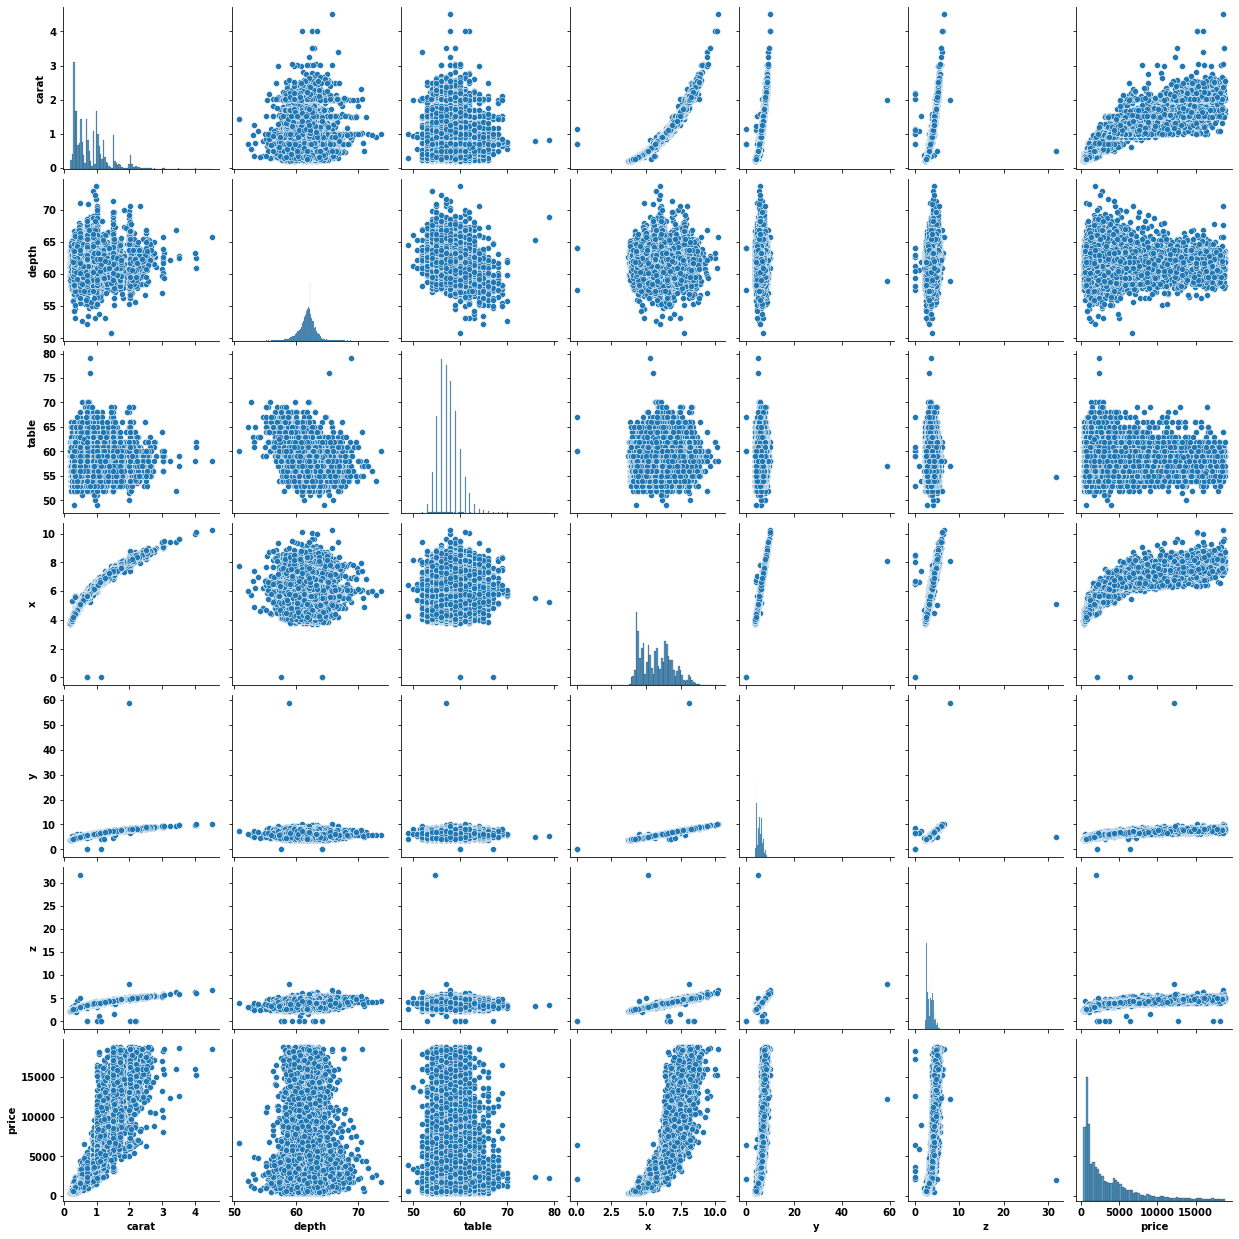

In [10]:
# Plotting pair plot.

sns.pairplot(zirconia)
plt.show()

In [11]:
# Checking the data set after feature dummy encoding.

zirconia.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [12]:
# Checking the duplicate values.

dups = zirconia.duplicated()
zirconia[dups]

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


#### Inference: 

* There are 34 rows carrying duplicate values, therefore need to drop these. 

In [13]:
# Dropping the duplicates.

zirconia.drop_duplicates(inplace=True)

#### Comparing the unique counts from above

In [14]:
zirconia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


#### Inference:

* As we can observe from the above table, in the new dataset, there are 24 columns, in which 6'float64', 1'int64' and 17'unit8'.

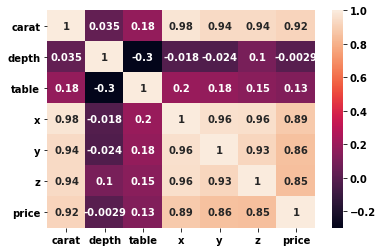

In [15]:
sns.heatmap(zirconia.corr(), annot=True)
plt.show()

#### Inference: 

* From the above correlation table, the most correlated variables are as follows:

* price,carat,x,y,z are highly positively correlated.

* while depth,table,x,y,price are negatively correlated. 

#### Plotting the histograms.

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

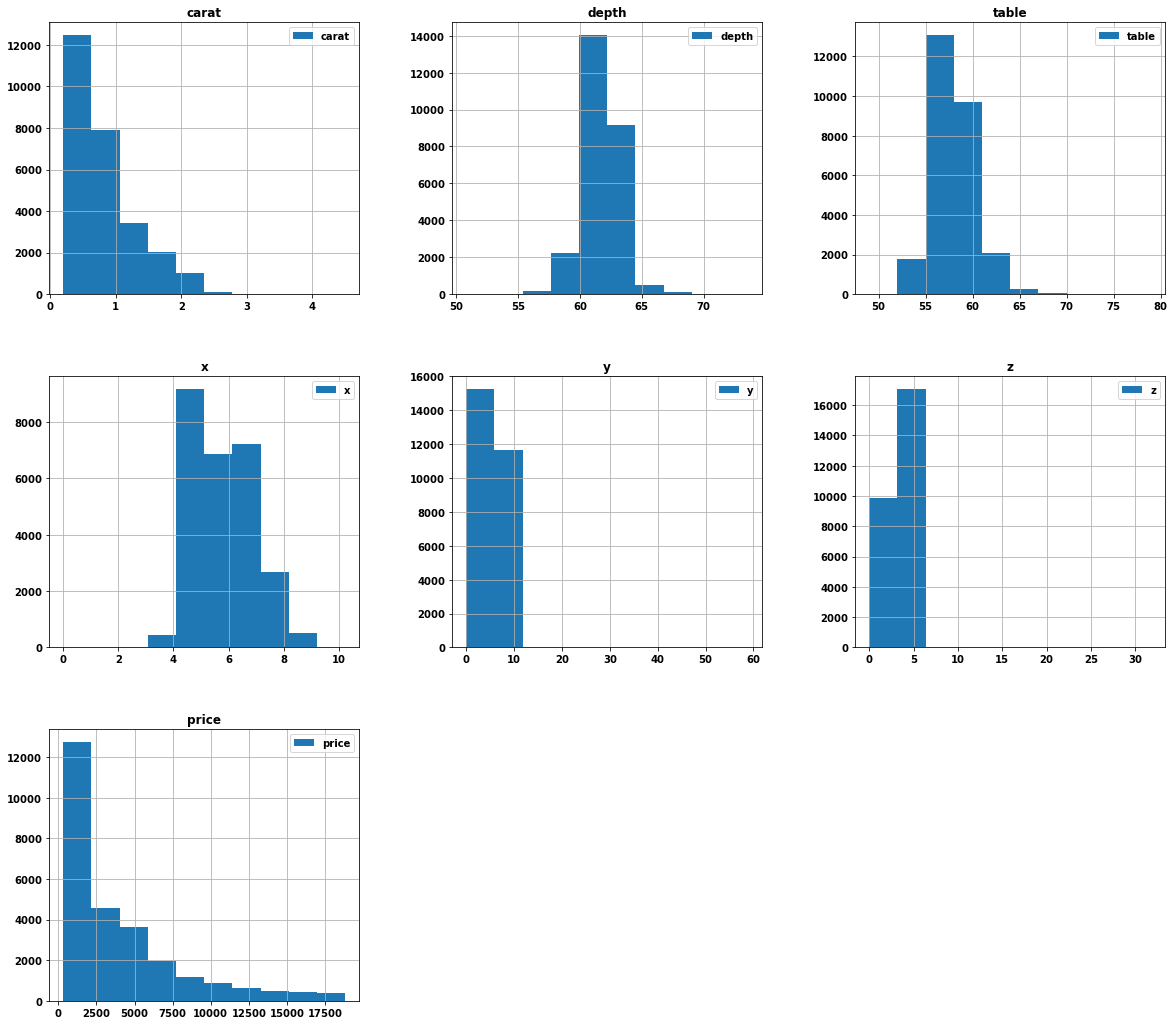

In [16]:
#Plot to see the individual distribution of every continuous feature.

zirconia.hist(figsize=(20,18),legend= True)

#### Inference:

* Most of the zirconia stones (approx 20 thousands) in the dataset weigh less than 1.5 carat.  

* Approx 23 thousand zirconia stones in the dataset has depth between 60-65.

* Approx 25 thousand zirconia stones in the dataset has table between 55-65 i.e. most of the stones has width of 55-65% of average diameter.

* Almost 95% of the stones' length ranges between 4-8 mm, width between 0-10 mm and height between 0-5 mm.   

* Around 20 thousand stones in the dataset have price less than 5000. 


#### Checking the skewness in the data set.

In [17]:
# Checking the skewness

import scipy.stats as stats

skewness = pd.DataFrame({'Skewness' : [stats.skew(zirconia.carat),stats.skew(zirconia.depth),stats.skew(zirconia.table),
                                                                           stats.skew(zirconia.x),stats.skew(zirconia.y),
                                      stats.skew(zirconia.z),stats.skew(zirconia.price)]},
                        index =['carat','depth','table','x','y','z','price'])

skewness

,Skewness
carat,1.114727
depth,NaN
table,0.765762
x,0.392268
y,3.867549
z,2.580521
price,1.619025


#### Inference: 

* Attributes like carat, table, y, z, price are strongly right skewed and attribute 'depth' is left skewed. 

* Whereas attribute x is hardly any skewed. 

#### Checking outliers by plotting boxplots:

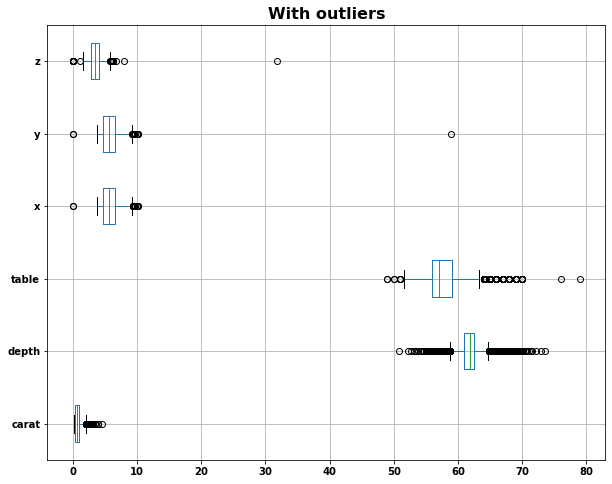

In [18]:
cont=zirconia.dtypes[(zirconia.dtypes!='uint8')&(zirconia.dtypes!='int64')].index
plt.figure(figsize=(10,8))
zirconia[cont].boxplot(vert=0)
plt.title('With outliers', fontsize=16)
plt.show()

#### Inference:

* All the variables shown above in the output z, y, x, table, depth and carat have outliers. 

### 1.2) Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [19]:
# Checking the missing values.

zirconia.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth       True
table      False
x          False
y          False
z          False
price      False
dtype: bool

#### Inference: 

* There are no null values in the data set, except in a column named 'depth'.

In [20]:
### Checking the count of null values in the 'depth' column.

zirconia.depth.isnull().sum()

697

#### Inference: There are 697 null values in the depth column of zirconia dataset.

In [21]:
# Imputing null values. 

# Filling the null values in depth column with the column's median. 

for column in zirconia.columns:
    if zirconia[column].dtype!='object':
        median=zirconia[column].median()
        zirconia[column]=zirconia[column].fillna(median)

In [22]:
#  checking again if any missing value present in the data set.

zirconia.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [23]:
# Checking the statistical summary of the dataset.

zirconia.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26933.0,61.746701,1.393875,50.8,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


In [24]:
# Checking if there are any 0s in any variables.

zirconia.eq(0).any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
x           True
y           True
z           True
price      False
dtype: bool

#### Inference:

* From the above output, we can observe 0s are present in the measurement columns like 'x', 'y', 'z', and in the categorical variables. Therefore, we need to futher examine the 0s in the continuous variables in the measurement columns 'x,y,z'. 

In [25]:
### Dropping values = 0 from the continuous variables x,y,z. 

zirconia_0 = zirconia.loc[((zirconia['x']==0) | (zirconia['y']==0) | (zirconia['z']==0))]

In [26]:
zirconia_no_0 = zirconia.drop(zirconia.loc[((zirconia['x']==0) | (zirconia['y']==0) | (zirconia['z']==0))].index, inplace=True)

#### Inference: 

* We have dropped '0' values from the measurements because these are data entries of the measurement of diamonds and it is not possible to have diamonds with '0' measurements, so it was quite important to filter these anamolies from our dataset to make our model more accurate.

In [27]:
#### Checking the sub_levels of Ordinal Variables

for column in zirconia.columns:
    if zirconia[column].dtype=='object':
        print(column.upper(),':',zirconia[column].nunique())
        print(zirconia[column].value_counts().sort_values())
        print('\n')

CUT : 5
Fair           779
Good          2434
Very Good     6027
Premium       6880
Ideal        10805
Name: cut, dtype: int64


COLOR : 7
J    1440
I    2765
D    3341
H    4091
F    4722
E    4916
G    5650
Name: color, dtype: int64


CLARITY : 8
I1       362
IF       891
VVS1    1839
VVS2    2530
VS1     4086
SI2     4561
VS2     6092
SI1     6564
Name: clarity, dtype: int64




#### Inference:

* We can see there are various sub_levels for each ordinal variable, however we can have scope of combining some levels in 'Clarity' and 'cut' feature because these features are divided among many sub-levels which don't seem to have much relevance for our model. 

* Therefore, we can combine 'VVS1 and VVS2' as VVS, also 'VS1 and VS2 as VS' again 'SI1 and SI2 as SI' in clarity and we can combine 'premium' and 'very good' sub-levels of 'cut' variable. So, in this way we can short these sub-levels to only 5 categories.  

#### Combining the sub_levels of the ordinal variables.

In [28]:
zirconia['clarity'] = np.where(zirconia['clarity'] =='VVS1','VVS', zirconia['clarity'])
zirconia['clarity'] = np.where(zirconia['clarity'] =='VVS2','VVS', zirconia['clarity'])
zirconia['clarity'] = np.where(zirconia['clarity'] =='VS1','VS', zirconia['clarity'])
zirconia['clarity'] = np.where(zirconia['clarity'] =='VS2','VS', zirconia['clarity'])
zirconia['clarity'] = np.where(zirconia['clarity'] =='SI1','SI', zirconia['clarity'])
zirconia['clarity'] = np.where(zirconia['clarity'] =='SI2','SI', zirconia['clarity'])
zirconia['cut'] = np.where(zirconia['cut'] == 'Very Good','Premium', zirconia['cut'])
zirconia.clarity.value_counts()
zirconia.cut.value_counts()

Premium    12907
Ideal      10805
Good        2434
Fair         779
Name: cut, dtype: int64

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [29]:
# convert my categorical variables to dummy variables using one-hot-encoding.

cut_dummy =pd.get_dummies(zirconia['cut'], drop_first=True)
colors_dummy =pd.get_dummies(zirconia['color'], drop_first=True)
clarity_dummy=pd.get_dummies(zirconia['clarity'], drop_first=True)

In [30]:
zirconia = pd.concat([zirconia, cut_dummy, colors_dummy, clarity_dummy], axis = 1)

In [31]:
zirconia.drop(['cut','color','clarity'], axis=1, inplace=True)

In [32]:
zirconia.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26925.0,0.797821,0.477085,0.20,0.40,0.70,1.05,4.50
depth,26925.0,61.746982,1.393457,50.80,61.10,61.80,62.50,73.60
table,26925.0,57.455305,2.231327,49.00,56.00,57.00,59.00,79.00
x,26925.0,5.729385,1.126081,3.73,4.71,5.69,6.55,10.23
y,26925.0,5.733152,1.163820,3.71,4.71,5.70,6.54,58.90
z,26925.0,3.538820,0.717483,1.07,2.90,3.52,4.04,31.80
price,26925.0,3936.249991,4020.983187,326.00,945.00,2373.00,5353.00,18818.00
Good,26925.0,0.090399,0.286758,0.00,0.00,0.00,0.00,1.00
Ideal,26925.0,0.401300,0.490171,0.00,0.00,0.00,1.00,1.00
Premium,26925.0,0.479369,0.499583,0.00,0.00,0.00,1.00,1.00


### Scaling the data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
x=StandardScaler()


In [35]:
scaled_zirconia=x.fit_transform(zirconia)

#### Building Model using LinearRegression

In [36]:
X=zirconia.drop(['price'], axis=1)
y=zirconia[['price']]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=1)

In [38]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [39]:
for idx, col_name in enumerate(X_train.columns):
    print("The coeficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coeficient for carat is 11417.412126835943
The coeficient for depth is -72.33847432236041
The coeficient for table is -33.87988697821254
The coeficient for x is -1106.214227131457
The coeficient for y is -11.549987176172976
The coeficient for z is -39.899465185845656
The coeficient for Good is 498.72954803032144
The coeficient for Ideal is 743.6755193568936
The coeficient for Premium is 640.6762138066289
The coeficient for E is -191.01893190118875
The coeficient for F is -242.8926122429221
The coeficient for G is -442.36586458675407
The coeficient for H is -950.3998036957021
The coeficient for I is -1469.032844922934
The coeficient for J is -2249.4580689029776
The coeficient for IF is 5089.603457257352
The coeficient for SI is 3109.7223752251666
The coeficient for VS is 4220.603808482904
The coeficient for VVS is 4783.868138131162


In [40]:
regression_model.intercept_[0]

3896.612828962605

In [41]:
regression_model.score(X_train,y_train)

0.9138946312186144

In [42]:
regression_model.score(X_test,y_test)

0.9181828078151101

In [43]:
from sklearn import metrics,model_selection
predicted_train=regression_model.fit(X_train,y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1176.1154518266292

In [44]:
predicted_test=regression_model.fit(X_test,y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1147.521431146882

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 20:
        print ("Variance Inflation Factor for Variable", column , "is", round(vif[i],2))
        i = i+1

Variance Inflation Factor for Variable carat is 84.53
Variance Inflation Factor for Variable depth is 623.24
Variance Inflation Factor for Variable table is 630.99
Variance Inflation Factor for Variable x is 1142.81
Variance Inflation Factor for Variable y is 349.03
Variance Inflation Factor for Variable z is 386.67
Variance Inflation Factor for Variable Good is 4.15
Variance Inflation Factor for Variable Ideal is 15.37
Variance Inflation Factor for Variable Premium is 17.76
Variance Inflation Factor for Variable E is 2.48
Variance Inflation Factor for Variable F is 2.44
Variance Inflation Factor for Variable G is 2.78
Variance Inflation Factor for Variable H is 2.29
Variance Inflation Factor for Variable I is 1.92
Variance Inflation Factor for Variable J is 1.51
Variance Inflation Factor for Variable IF is 3.6
Variance Inflation Factor for Variable SI is 32.33
Variance Inflation Factor for Variable VS is 29.97
Variance Inflation Factor for Variable VVS is 13.61


#### LINEAR REGRESSION USING STATSMODEL: 

In [46]:
data_train=pd.concat([X_train,y_train], axis=1)
data_test=pd.concat([X_test,y_test], axis=1)


In [47]:
expr= 'price ~ carat + depth + table + x + y + z + Good + Ideal + Premium + E + F + G + H + I + J + IF + SI + VS + VVS'

In [48]:
import statsmodels.formula.api as smf

lm1=smf.ols(formula=expr,data=data_train).fit()
lm1.params

Intercept     3896.612829
carat        11417.412127
depth          -72.338474
table          -33.879887
x            -1106.214227
y              -11.549987
z              -39.899465
Good           498.729548
Ideal          743.675519
Premium        640.676214
E             -191.018932
F             -242.892612
G             -442.365865
H             -950.399804
I            -1469.032845
J            -2249.458069
IF            5089.603457
SI            3109.722375
VS            4220.603808
VVS           4783.868138
dtype: float64

In [49]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.052e+04
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:04:47   Log-Likelihood:            -1.5999e+05
No. Observations:               18847   AIC:                         3.200e+05
Df Residuals:                   18827   BIC:                         3.202e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3896.6128    718.761      5.421      0.0

In [50]:
expr2= 'price ~ carat + depth + table + x + y + z + Good + Ideal + Premium + E + F + G + H + I + J + IF + SI + VS + VVS'

In [51]:
lm2=smf.ols(formula=expr2,data=data_test).fit()
lm2.params

Intercept    -8565.810160
carat        11584.564225
depth          101.751064
table          -10.716946
x            -1339.409958
y             1848.748492
z            -2791.653976
Good           709.162279
Ideal         1036.225052
Premium        918.933714
E             -232.020201
F             -276.094029
G             -436.970545
H             -939.940134
I            -1371.797779
J            -2440.309366
IF            5392.837884
SI            3551.484707
VS            4621.699540
VVS           5130.116185
dtype: float64

In [52]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end = ' ')

(-8565.81) * Intercept + (11584.56) * carat + (101.75) * depth + (-10.72) * table + (-1339.41) * x + (1848.75) * y + (-2791.65) * z + (709.16) * Good + (1036.23) * Ideal + (918.93) * Premium + (-232.02) * E + (-276.09) * F + (-436.97) * G + (-939.94) * H + (-1371.8) * I + (-2440.31) * J + (5392.84) * IF + (3551.48) * SI + (4621.7) * VS + (5130.12) * VVS + 

In [53]:
y_pred=lm2.predict(data_test)

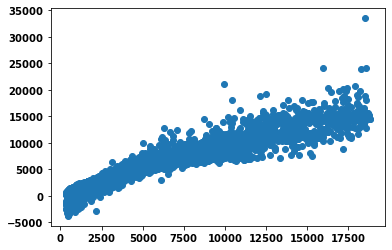

In [54]:
plt.scatter(y_test['price'],y_pred)
plt.show()

In [55]:
# calculate mean square error
mse=np.mean((lm2.predict(data_train.drop('price', axis=1))-data_train['price'])**2)

In [56]:
np.sqrt(mse)

1458.7518069276205

In [57]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 84.53487844296751
depth ---> 623.2374991537591
table ---> 630.9940686548167
x ---> 1142.8104553179219
y ---> 349.0308999054134
z ---> 386.6697055254589
Good ---> 4.146879079976102
Ideal ---> 15.366983061817582
Premium ---> 17.76074383026213
E ---> 2.479673167613621
F ---> 2.4449842007172906


### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

#### Refer report for inference.

## Problem 2: Logistic Regression and LDA

### Problem Statement: You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [58]:
#Loading the data 

hp = pd.read_csv("D:\Study\Data Science and Machine Learning\Great_learning course\Main content\Module5 - Predictive Modelling\Project\Holiday_Package.csv")

In [59]:
# Checking first five rows of the data
hp.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [60]:
# Dropping the unwanted variable 'Unnamed:0'

hp.drop('Unnamed: 0', axis=1, inplace = True)

In [61]:
# Checking the data information:

hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [62]:
# Checking shape of the dataframe.

hp.shape

(872, 7)

In [63]:
# Checking null values in the data frame.

hp.isnull().any()

Holliday_Package     False
Salary               False
age                  False
educ                 False
no_young_children    False
no_older_children    False
foreign              False
dtype: bool

In [64]:
# check for duplicates

hp.duplicated().any()

False

In [65]:
# Checking unique counts of the categorical columns.

for column in hp.columns:
    if hp[column].dtype=='object':
        print(column.upper(),':',hp[column].nunique())
        print(hp[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE : 2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN : 2
yes    216
no     656
Name: foreign, dtype: int64




In [66]:
hp.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

#### Univariate Analysis: 

In [67]:
hp.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,71115.9,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,55.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,13.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,1.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,2.0,6.0


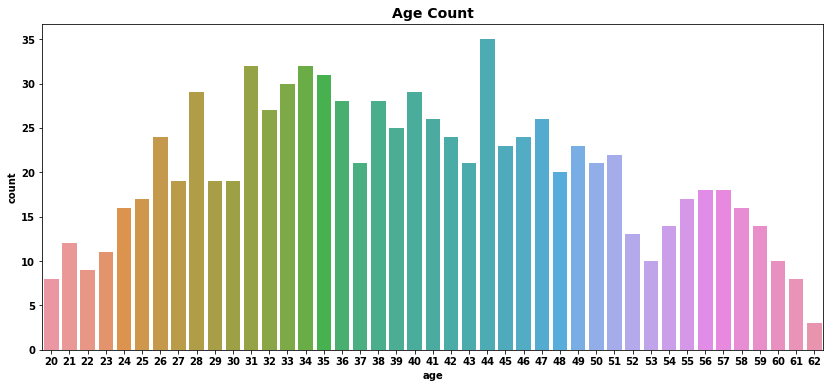

In [68]:
plt.figure(figsize=(14,6));
sns.countplot(hp['age'])
plt.title("Age Count", fontsize=14);
plt.show()

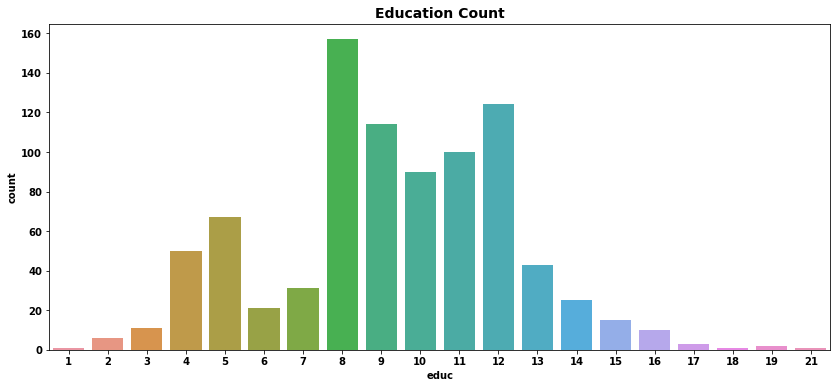

In [69]:
plt.figure(figsize=(14,6));
sns.countplot(hp['educ'])
plt.title("Education Count", fontsize=14);
plt.show()

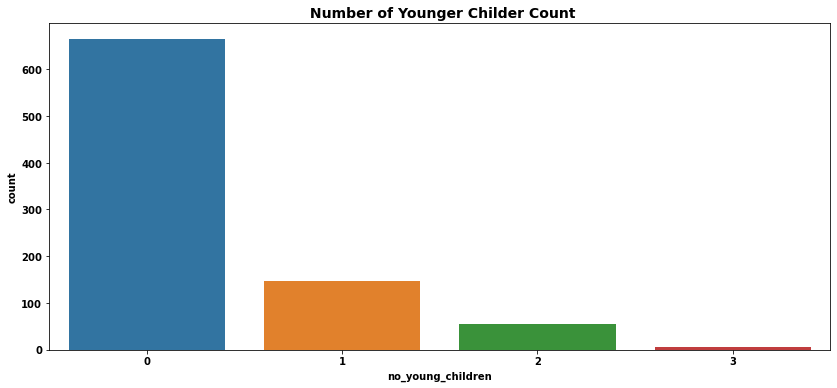

In [70]:
plt.figure(figsize=(14,6));
sns.countplot(hp['no_young_children'])
plt.title(" Number of Younger Childer Count", fontsize=14);
plt.show()

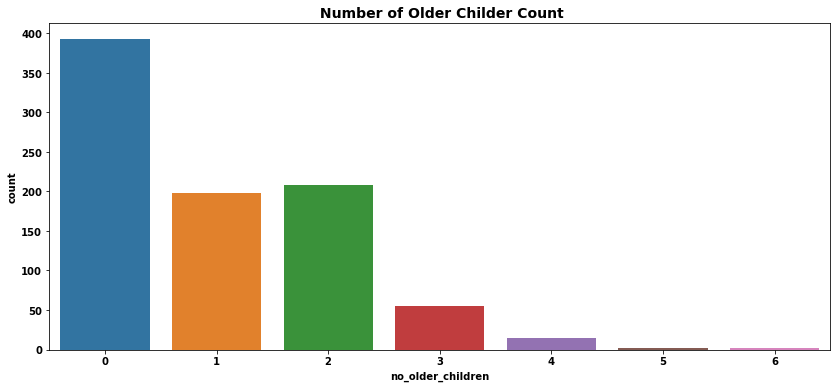

In [71]:
plt.figure(figsize=(14,6));
sns.countplot(hp['no_older_children'])
plt.title(" Number of Older Childer Count", fontsize=14);
plt.show()

In [72]:
def univariateAnalysis_numeric(column,nbins):
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=hp[column])
    plt.show()

In [73]:
hp_num = hp.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(hp_num.columns.values)
len(lstnumericcolumns)

5

BoxPlot of Salary
----------------------------------------------------------------------------


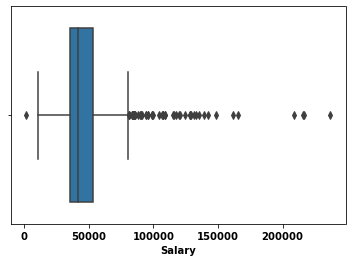

BoxPlot of age
----------------------------------------------------------------------------


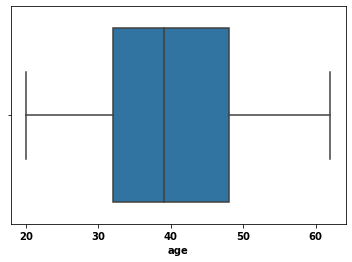

BoxPlot of educ
----------------------------------------------------------------------------


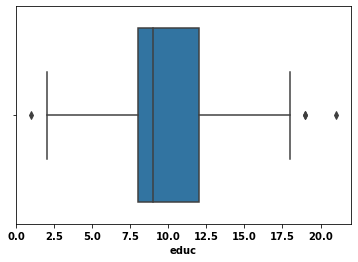

BoxPlot of no_young_children
----------------------------------------------------------------------------


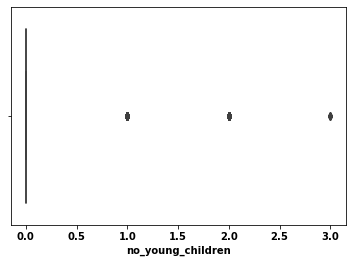

BoxPlot of no_older_children
----------------------------------------------------------------------------


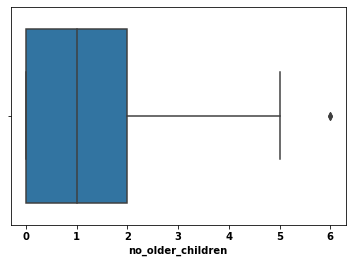

In [74]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

#### Bivariate and Multivariate Analysis: 

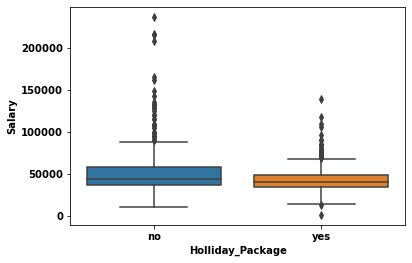

In [75]:
sns.boxplot(hp['Holliday_Package'],hp['Salary']);

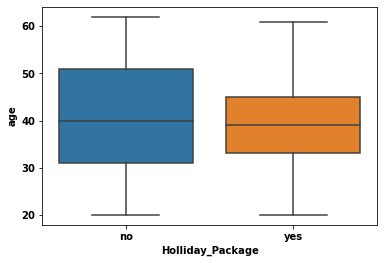

In [76]:
sns.boxplot(hp['Holliday_Package'],hp['age']);

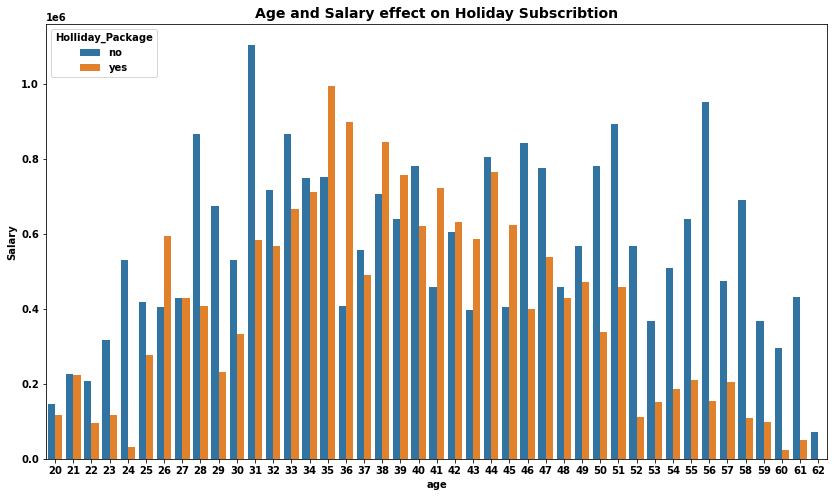

In [77]:
plt.figure(figsize=(14,8));
sns.barplot( x='age', y='Salary', hue= 'Holliday_Package', estimator = np.sum, data=hp, ci=None)
plt.title("Age and Salary effect on Holiday Subscribtion", fontsize=14);
plt.show()

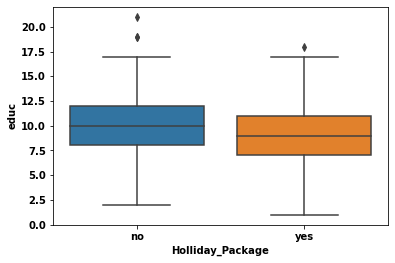

In [78]:
sns.boxplot(hp['Holliday_Package'],hp['educ']);

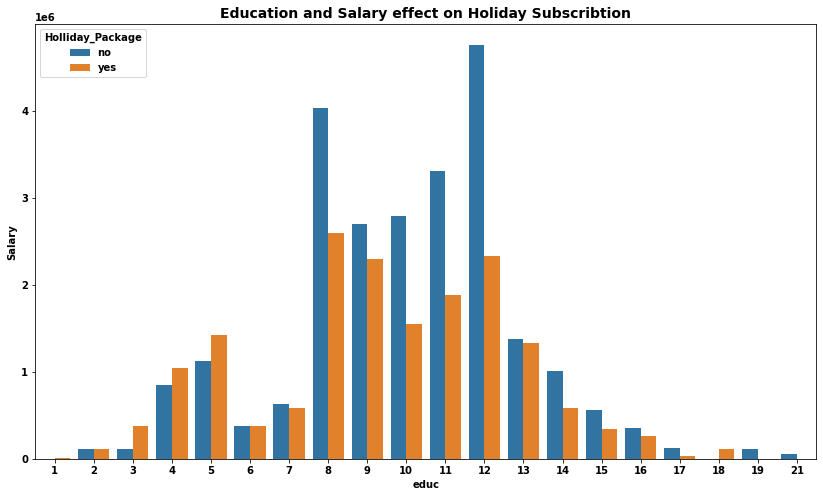

In [79]:
plt.figure(figsize=(14,8));
sns.barplot( x='educ', y='Salary', hue= 'Holliday_Package', estimator = np.sum, data=hp, ci=None)
plt.title("Education and Salary effect on Holiday Subscribtion", fontsize=14);
plt.show();

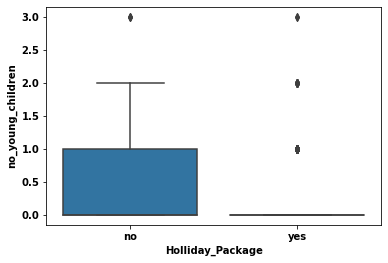

In [80]:
sns.boxplot(hp['Holliday_Package'],hp['no_young_children']);

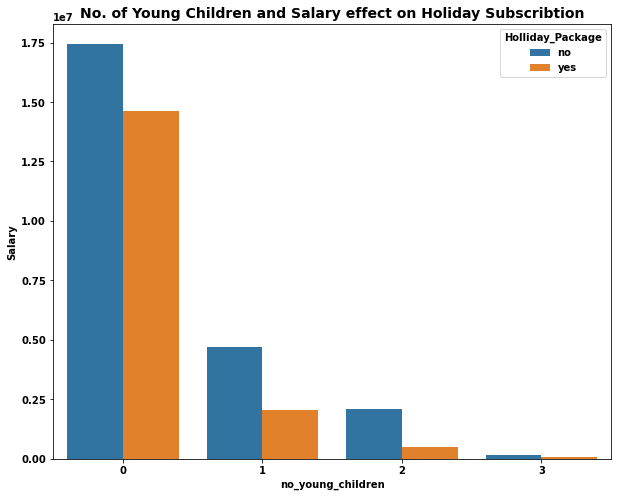

In [81]:
plt.figure(figsize=(10,8));
sns.barplot( x='no_young_children', y='Salary',hue= 'Holliday_Package', estimator = np.sum, data=hp, ci=None)
plt.title("No. of Young Children and Salary effect on Holiday Subscribtion", fontsize=14);
plt.show()

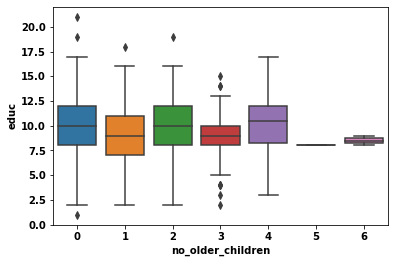

In [82]:
sns.boxplot(hp['no_older_children'],hp['educ']);

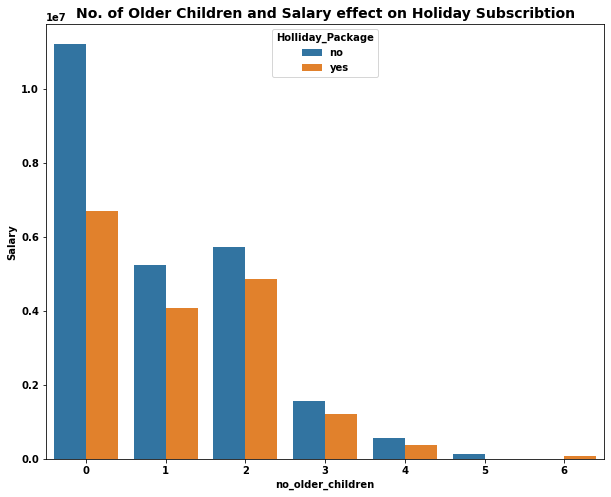

In [83]:
plt.figure(figsize=(10,8));
sns.barplot( x='no_older_children', y='Salary',hue= 'Holliday_Package', estimator = np.sum, data=hp, ci=None)
plt.title("No. of Older Children and Salary effect on Holiday Subscribtion", fontsize=14);
plt.show()

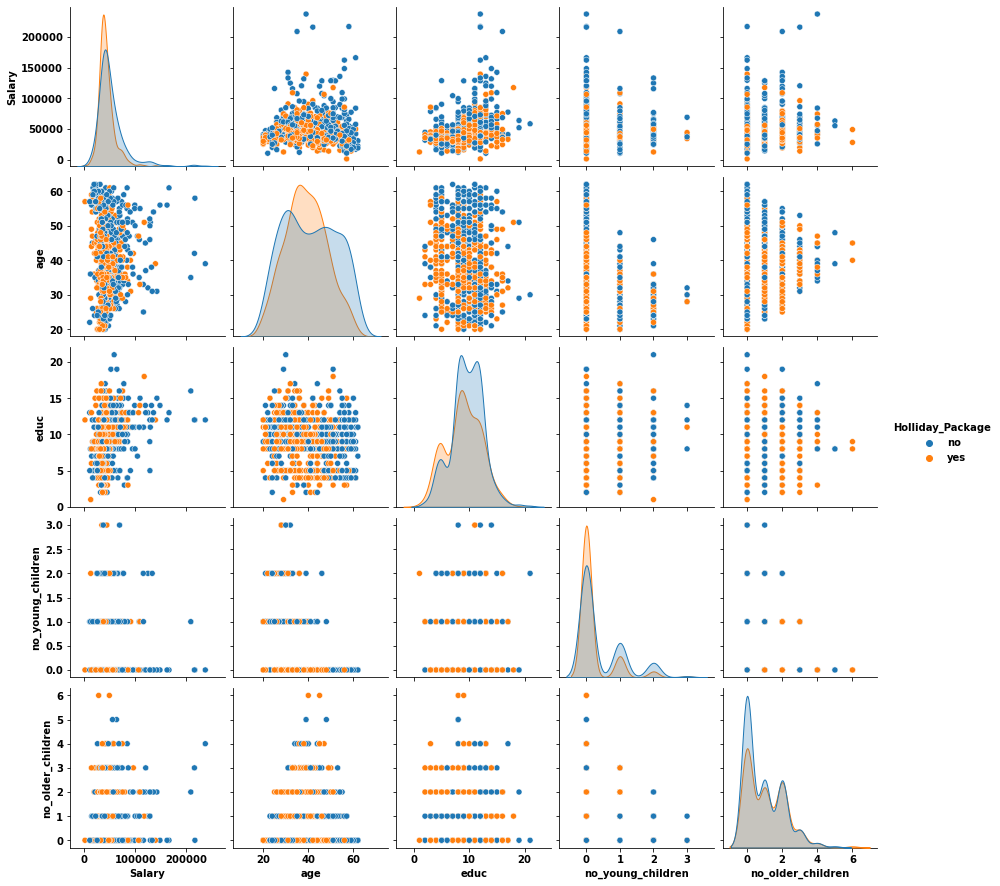

In [84]:
sns.pairplot(hp ,diag_kind='kde',hue='Holliday_Package');

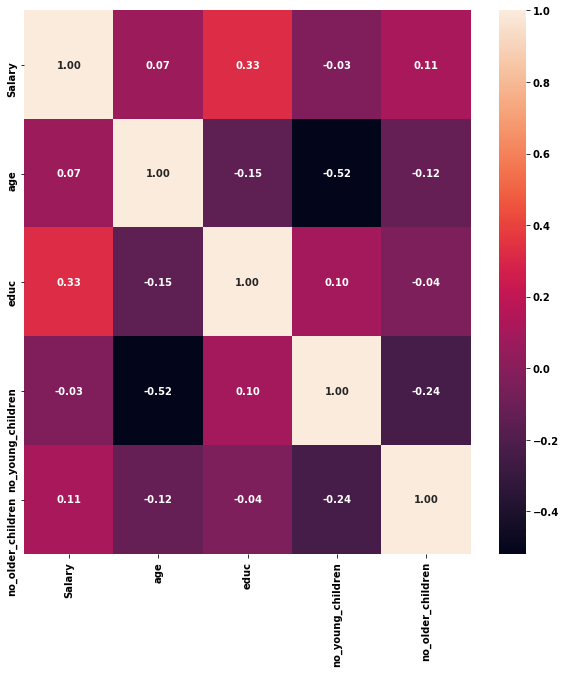

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(hp.corr(),annot=True,fmt=".2f");

#### Outlier Treatment

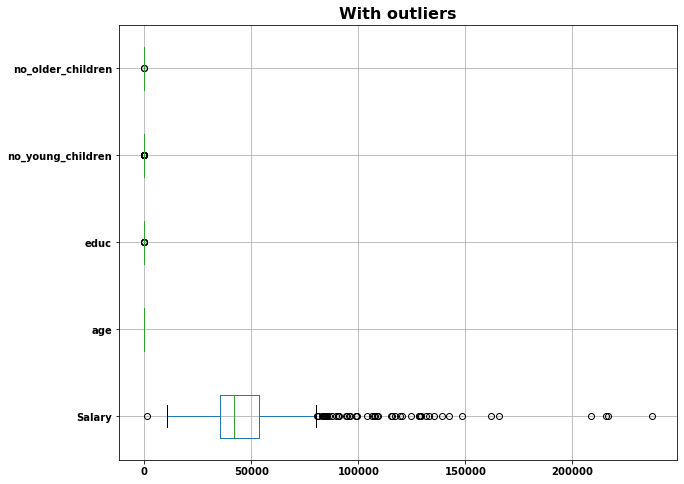

In [86]:
cont=hp.dtypes[(hp.dtypes!='uint8') & (hp.dtypes!='object')].index
plt.figure(figsize=(10,8))
hp[cont].boxplot(vert=0)
plt.title('With outliers', fontsize=16)
plt.show()

In [87]:
def treat_outlier(x):
    # taking 25,75 percentile of column
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    # flooring and Capping outliers
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [88]:
for column in hp[cont].columns:
    hp[column]=treat_outlier(hp[column])

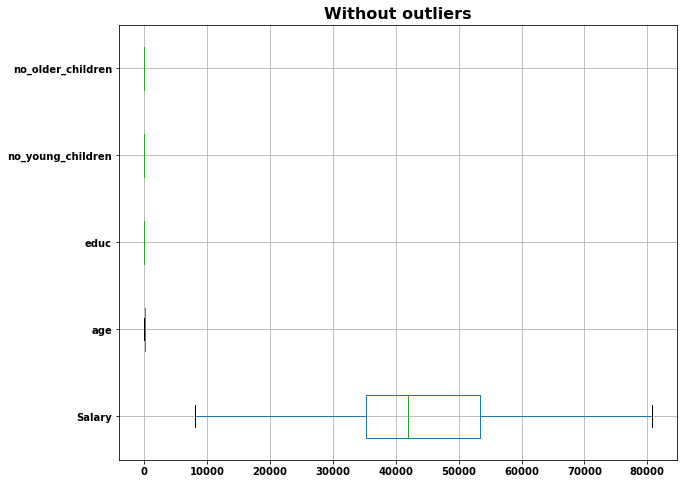

In [89]:
cont=hp.dtypes[(hp.dtypes!='uint8')&(hp.dtypes!='bool')].index
plt.figure(figsize=(10,8))
hp[cont].boxplot(vert=0)
plt.title('Without outliers', fontsize=16)
plt.show()

#### One Hot Encoding: 

In [90]:
hp =pd.get_dummies(hp, columns = ['Holliday_Package','foreign'], drop_first=True)

In [91]:
hp.info()
hp.describe(include = "all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Salary                872 non-null    float64
 1   age                   872 non-null    int64  
 2   educ                  872 non-null    float64
 3   no_young_children     872 non-null    float64
 4   no_older_children     872 non-null    float64
 5   Holliday_Package_yes  872 non-null    uint8  
 6   foreign_yes           872 non-null    uint8  
dtypes: float64(4), int64(1), uint8(2)
memory usage: 35.9 KB


,count,mean,std,min,25%,50%,75%,max
Salary,872.0,45608.336869,15699.745151,8105.75,35324.0,41903.5,53469.5,80687.75
age,872.0,39.955275,10.551675,20.00,32.0,39.0,48.0,62.00
educ,872.0,9.302752,3.014712,2.00,8.0,9.0,12.0,18.00
no_young_children,872.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.00
no_older_children,872.0,0.980505,1.077197,0.00,0.0,1.0,2.0,5.00
Holliday_Package_yes,872.0,0.459862,0.498672,0.00,0.0,0.0,1.0,1.00
foreign_yes,872.0,0.247706,0.431928,0.00,0.0,0.0,0.0,1.00


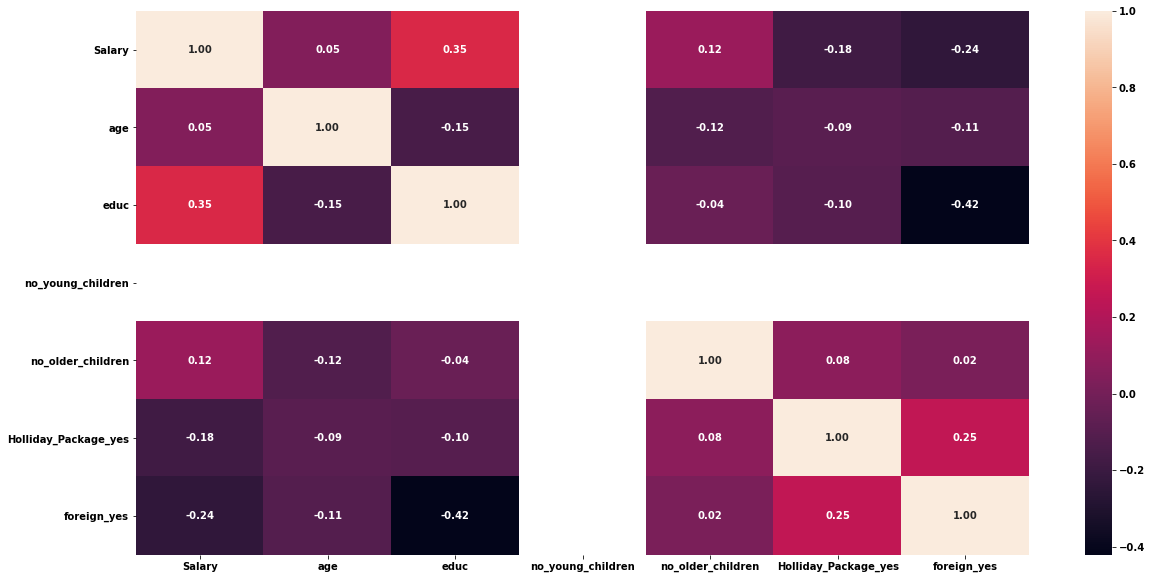

In [92]:
plt.figure(figsize=(20,10))
sns.heatmap(hp.corr(),annot=True,fmt=".2f");

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

#### LOGISTIC REGRESSION ANALYSIS:

In [93]:
XLR = hp.drop('Holliday_Package_yes', axis=1)
 
yLR = hp['Holliday_Package_yes']

In [94]:
# Split X and y into training and test set in 70:30 ratio
XLR_train, XLR_test, yLR_train, yLR_test = train_test_split(XLR, yLR, test_size=0.30 , random_state=1,stratify=hp['Holliday_Package_yes'])

In [95]:
yLR_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [96]:
yLR_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package_yes, dtype: float64

In [97]:
print('Number of rows and columns of the training set for the independent variables:',XLR_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',yLR_train.shape)
print('Number of rows and columns of the test set for the independent variables:',XLR_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',yLR_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [98]:
# Fit the Logistic Regression model
model_LR = LogisticRegression(solver='newton-cg',max_iter=100000,penalty='none',verbose=True,n_jobs= -1,tol = 0.0001)
LR = model_LR.fit(XLR_train, yLR_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.3s finished


#### LINEAR DISCRIMINANT ANALYSIS:

In [99]:
XLDA=hp.drop('Holliday_Package_yes', axis=1)

yLDA=hp['Holliday_Package_yes']

In [100]:
# Split X and y into training and test set in 70:30 ratio
XLDA_train, XLDA_test, yLDA_train, yLDA_test = train_test_split(XLDA, yLDA, test_size=0.30 , random_state=1,stratify=hp['Holliday_Package_yes'])

In [101]:
yLDA_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [102]:
yLDA_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package_yes, dtype: float64

In [103]:
print('Number of rows and columns of the training set for the independent variables:',XLDA_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',yLDA_train.shape)
print('Number of rows and columns of the test set for the independent variables:',XLDA_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',yLDA_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [104]:
#Build LDA Model
model_LDA = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None, solver='svd', store_covariance=False, tol=0.0001)
LDA = model_LDA.fit(XLDA_train,yLDA_train)

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [105]:
ytrain_lrpredict = LR.predict(XLR_train)
ytest_lrpredict = LR.predict(XLR_test)

In [106]:
ytest_lrpredict_prob=LR.predict_proba(XLR_test)
pd.DataFrame(ytest_lrpredict_prob).head()

,0,1
0,0.640764,0.359236
1,0.569909,0.430091
2,0.655265,0.344735
3,0.564147,0.435853
4,0.538869,0.461131


In [107]:
# Accuracy - Training Data
LR_train_acc = LR.score(XLR_train, yLR_train)
print("The accuracy for training data set for Logistic Regression is", round(LR_train_acc,2)*100, "%")

The accuracy for training data set for Logistic Regression is 63.0 %


In [108]:
# Accuracy - Test Data
LR_test_acc = LR.score(XLR_test, yLR_test)
print("The accuracy for test data set for Logistic Regression is", round(LR_test_acc,2)*100, "%")

The accuracy for test data set for Logistic Regression is 66.0 %


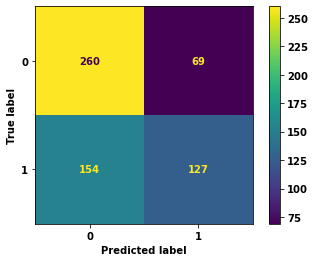

In [109]:
plot_confusion_matrix(LR,XLR_train,yLR_train);

In [110]:
print(classification_report(yLR_train, ytrain_lrpredict))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       329
           1       0.65      0.45      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610



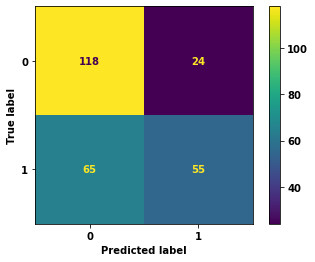

In [111]:
plot_confusion_matrix(LR,XLR_test,yLR_test);

In [112]:
print(classification_report(yLR_test, ytest_lrpredict))

              precision    recall  f1-score   support

           0       0.64      0.83      0.73       142
           1       0.70      0.46      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.64       262
weighted avg       0.67      0.66      0.65       262



AUC: 0.661
AUC: 0.675


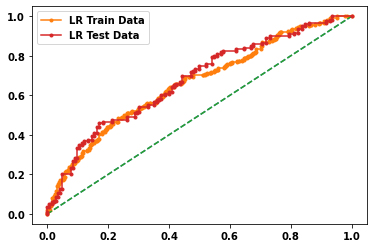

In [113]:
# predict probabilities
LR_probs1x = LR.predict_proba(XLR_train)
# keep probabilities for the positive outcome only
LR_probs1x[:,1] = LR_probs1x[:, 1]
# calculate AUC
LR_train_auc = metrics.roc_auc_score(yLR_train, LR_probs1x[:,1])
print('AUC: %.3f' % LR_train_auc)
# calculate roc curve
LR_train_fpr, LR_train_tpr, LR_train_thresholds = metrics.roc_curve(yLR_train, LR_probs1x[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_train_fpr, LR_train_tpr, marker='.',label='LR Train Data');
# AUC and ROC for the training data

# predict probabilities
LR_probs2x = LR.predict_proba(XLR_test)
# keep probabilities for the positive outcome only
LR_probs2x[:,1] = LR_probs2x[:, 1]
# calculate AUC
LR_test_auc = metrics.roc_auc_score(yLR_test, LR_probs2x[:,1])
print('AUC: %.3f' % LR_test_auc)
# calculate roc curve
LR_test_fpr, LR_test_tpr, LR_test_thresholds = metrics.roc_curve(yLR_test, LR_probs2x[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_test_fpr, LR_test_tpr, marker='.',label='LR Test Data');
# AUC and ROC for the training data

plt.legend(loc='best')
plt.show()

### LINEAR DISCRIMINANT MODEL PERFORMANCE:

In [114]:
ytrain_ldapredict = LDA.predict(XLDA_train)
ytest_ldapredict = LDA.predict(XLDA_test)

In [115]:
ytest_ldapredict_prob=LDA.predict_proba(XLDA_test)
pd.DataFrame(ytest_ldapredict_prob).head()

,0,1
0,0.644519,0.355481
1,0.574252,0.425748
2,0.658803,0.341197
3,0.567407,0.432593
4,0.542866,0.457134


In [116]:
# Accuracy - Training Data
LDA_train_acc = LDA.score(XLDA_train, yLDA_train)
LDA_train_acc

0.6327868852459017

In [117]:
# Accuracy - Test Data
LDA_test_acc = LDA.score(XLDA_test, yLDA_test)
LDA_test_acc

0.6564885496183206

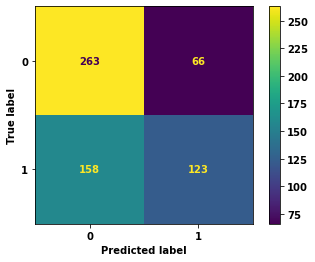

In [118]:
plot_confusion_matrix(LDA,XLDA_train,yLDA_train);


In [119]:
print(classification_report(yLDA_train, ytrain_ldapredict))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610



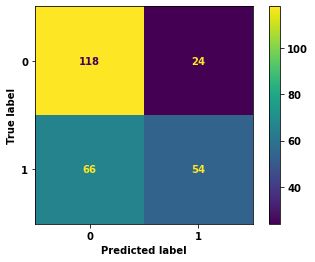

In [120]:
plot_confusion_matrix(LDA,XLDA_test,yLDA_test);

In [121]:
print(classification_report(yLDA_test, ytest_ldapredict))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262



AUC: 0.661
AUC: 0.675


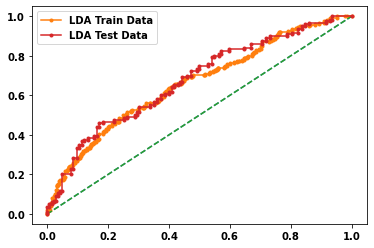

In [122]:
# predict probabilities
LDA_probs1x = LDA.predict_proba(XLDA_train)
# keep probabilities for the positive outcome only
LDA_probs1x[:,1] = LDA_probs1x[:, 1]
# calculate AUC
LDA_train_auc = metrics.roc_auc_score(yLDA_train, LDA_probs1x[:,1])
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = metrics.roc_curve(yLDA_train, LDA_probs1x[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr, marker='.',label='LDA Train Data');
# AUC and ROC for the training data

# predict probabilities
LDA_probs2x = LDA.predict_proba(XLDA_test)
# keep probabilities for the positive outcome only
LDA_probs2x[:,1] = LDA_probs2x[:, 1]
# calculate AUC
LDA_test_auc = metrics.roc_auc_score(yLDA_test, LDA_probs2x[:,1])
print('AUC: %.3f' % LDA_test_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = metrics.roc_curve(yLDA_test, LDA_probs2x[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr, marker='.',label='LDA Test Data');
# AUC and ROC for the training data

plt.legend(loc='best')
plt.show()

#### COMPARISON OF LOGISTICAL REGRESSION MODEL PERFORMANCE AND LINEAR DISCRIMINANT MODEL PERFORMANCE:

In [123]:
LR_metrics_Train = classification_report(yLR_train, ytrain_lrpredict,output_dict=True)
df_LR_Train = pd.DataFrame(LR_metrics_Train).transpose()
LR_train_precision = round(df_LR_Train.loc["1"][0],2)
LR_train_recall = round(df_LR_Train.loc["1"][1],2)
LR_train_f1 = round(df_LR_Train.loc["1"][2],2)

In [124]:
LR_metrics_Test = classification_report(yLR_test, ytest_lrpredict,output_dict=True)
df_LR_Test = pd.DataFrame(LR_metrics_Test).transpose()
LR_test_precision = round(df_LR_Test.loc["1"][0],2)
LR_test_recall = round(df_LR_Test.loc["1"][1],2)
LR_test_f1 = round(df_LR_Test.loc["1"][2],2)

In [125]:
LDA_metrics_Train = classification_report(yLDA_train, ytrain_ldapredict,output_dict=True)
df_LDA_Train = pd.DataFrame(LDA_metrics_Train).transpose()
LDA_train_precision = round(df_LDA_Train.loc["1"][0],2)
LDA_train_recall = round(df_LDA_Train.loc["1"][1],2)
LDA_train_f1 = round(df_LDA_Train.loc["1"][2],2)

In [126]:
LDA_metrics_Test = classification_report(yLDA_test, ytest_ldapredict,output_dict=True)
df_LDA_Test = pd.DataFrame(LDA_metrics_Test).transpose()
LDA_test_precision = round(df_LDA_Test.loc["1"][0],2)
LDA_test_recall = round(df_LDA_Test.loc["1"][1],2)
LDA_test_f1 = round(df_LDA_Test.loc["1"][2],2)

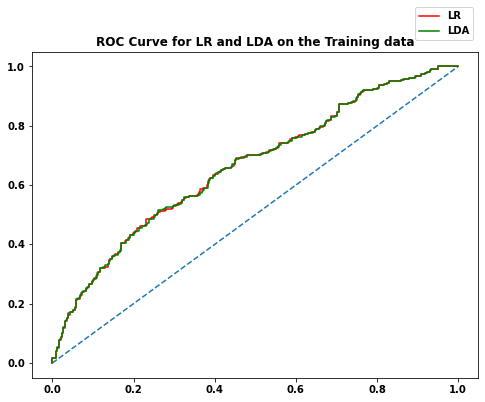

In [127]:
plt.figure(figsize=(8,6))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_train_fpr, LR_train_tpr,color='red',label="LR")
plt.plot(LDA_train_fpr,LDA_train_tpr,color='green',label="LDA")

plt.title('ROC Curve for LR and LDA on the Training data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

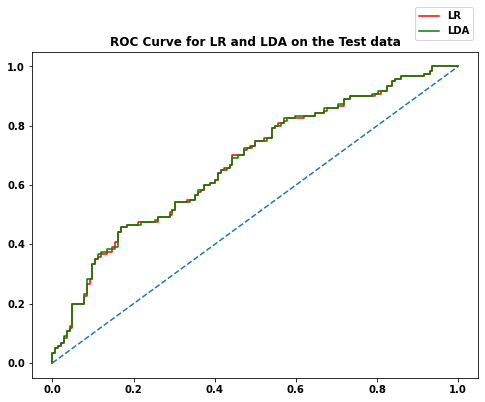

In [128]:
plt.figure(figsize=(8,6))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_test_fpr, LR_test_tpr,color='red',label="LR")
plt.plot(LDA_test_fpr,LDA_test_tpr,color='green',label="LDA")

plt.title('ROC Curve for LR and LDA on the Test data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

In [129]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression Train':[LR_train_acc,LR_train_auc,LR_train_recall,LR_train_precision,LR_train_f1],
        'Logistic Regression Test':[LR_test_acc,LR_test_auc,LR_test_recall,LR_test_precision,LR_test_f1],
       'Linear Discriminant Analysis Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'Linear Discriminant Analysis Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],},index=index)
round(data,2)

,Logistic Regression Train,Logistic Regression Test,Linear Discriminant Analysis Train,Linear Discriminant Analysis Test
Accuracy,0.63,0.66,0.63,0.66
AUC,0.66,0.67,0.66,0.68
Recall,0.45,0.46,0.44,0.45
Precision,0.65,0.70,0.65,0.69
F1 Score,0.53,0.55,0.52,0.55


#### 2.4 Inference: Basis on these predictions, what are the insights and recommendations. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

#### Answer - Refer report for inference.